In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [4]:
!pip install transformers
!git clone https://github.com/aub-mind/arabert
!pip install -r arabert/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.7 MB/s eta 0:00:00
Cloning into 'arabert'...
remote: Enumerating objects: 600, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 600 (delta 38), reused 45 (delta 30), pack-reused 535
Receiving objects: 100% (600/600), 9.14 MiB | 16.08 MiB/s, done.
Resolving deltas: 100% (339/339), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186459 sha256=0bbd99e1b303e3131aa057d8d8b22eba348ac051e7c6b3d358b4dd90877e7

In [5]:
! pip install -U sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=97d6bb7ee8b6d398363047b595427bffbcdb888d49d502bb92c551a6660bb114
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [6]:
from transformers import AutoTokenizer, AutoModel


In [7]:
model_name = "aubmindlab/bert-base-arabertv02-twitter"


In [21]:
df_train= pd.read_csv("/content/drive/MyDrive/df_train_OFF_preprocess.csv")
df_test= pd.read_csv("/content/drive/MyDrive/df_test_OFF_preprocess.csv")
df_train
# the column of Tweet_emoj is the tweet with emojis description

,Tweet,Tweet_emoj,OFF
0,الاحمر بيكون حلو وبحب رقم واي غلط انت عارفني 👊...,الاحمر بيكون حلو وبحب رقم واي غلط انت عارفني ل...,0
1,دعواتكم لامي يا جماعه تعبانه جدا 😷 💔 ياريت رتو...,دعواتكم لامي يا جماعه تعبانه جدا قناع قلب مجرو...,0
2,اموت شوقا ولا القاكم ابدا يا حسرتا ثم يا شوقا ...,اموت شوقا ولا القاكم ابدا يا حسرتا ثم يا شوقا ...,0
3,لعنه عليك يا مدرب يا كلب طلع ادواردو يا كلب,لعنه عليك يا مدرب يا كلب طلع ادواردو يا كلب,1
4,بعمل ايه كتير هو انت عشان قعدت معايا مره خلاص ...,بعمل ايه كتير هو انت عشان قعدت معايا مره خلاص ...,1
...,...,...,...
8799,في الجري اقصي حاجه مكن تاثر عليك شويه مطره او ...,في الجري اقصي حاجه مكن تاثر عليك شويه مطره او ...,0
8800,عيل تحملي لانه اهمال منك 🙄 👊,عيل تحملي لانه اهمال منك وجه بعيون متدحرجه لكمه,0
8801,اذا تشوفين هذا جميل واله مشكله,اذا تشوفين هذا جميل واله مشكله,0
8802,اعلامي هلالي وش ترجي منه اي واله الي قال محمد ...,اعلامي هلالي وش ترجي منه اي واله الي قال محمد ...,1


In [8]:
#remove null values
df_train = df_train.dropna(subset=['Tweet_emoj'])
df_train = df_train.dropna(subset=['Tweet'])
df_test = df_test.dropna(subset=['Tweet_emoj'])
df_test = df_test.dropna(subset=['Tweet'])


In [10]:
df_train["OFF"].value_counts()

0    4664
1    4131
Name: OFF, dtype: int64

In [12]:
df_test["OFF"].value_counts()


0    1166
1    1033
Name: OFF, dtype: int64

### SBERT embedding using Arabert


In [16]:
from sentence_transformers import SentenceTransformer
import torch
# Load the model
model = SentenceTransformer('aubmindlab/bert-base-arabertv02-twitter')
# Check if GPU is available
if torch.cuda.is_available():
    # Pass the model to the GPU
    model = model.to('cuda')
# Encode the sentences using the model
X = df_train['Tweet'].apply(model.encode)

Some weights of BertModel were not initialized from the model checkpoint at /root/.cache/torch/sentence_transformers/aubmindlab_bert-base-arabertv02-twitter and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
X_test = df_test['Tweet'].apply(model.encode)

In [ ]:
import pickle

file_path = "/content/drive/MyDrive/hsSBERT_dftrain_embeddings.pkl"

# Save the encoded values to a file using pickle
with open(file_path, "wb") as file:
    pickle.dump(X, file)

print("Encoded values saved successfully in Google Drive!")

Encoded values saved successfully in Google Drive!


In [18]:
X_train=X.to_list()
X_test=X_test.to_list()

In [19]:
Y_train=df_train["OFF"]
Y_test=df_test["OFF"]

### SVM


In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create an SVC object
svc = SVC()

# Define the parameter grid for grid search
param_grid = {
    'C': [10, 100],
    'gamma': [0.001,0.0001]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)

Best parameters: {'C': 10, 'gamma': 0.001}
Best score: 0.8550312677657761


In [22]:
from sklearn.metrics import (classification_report as creport)
from sklearn.metrics import f1_score

In [23]:
# Use the best estimator for prediction and scoring
best_estimator = grid_search.best_estimator_
predictions = best_estimator.predict(X_test)
score = best_estimator.score(X_test, Y_test)

print("Best parameters:", best_params)
print("Best score:", best_score)
print("Predictions:", predictions)
print("Accuracy score:", score)

Best parameters: {'C': 10, 'gamma': 0.001}
Best score: 0.8550312677657761
Predictions: [1 0 0 ... 0 0 0]
Accuracy score: 0.8562983174170077


In [26]:
#sbert svm emoj
print(creport(Y_test, predictions,target_names=['NOT_OFF', 'OFF'],digits=4))


              precision    recall  f1-score   support

     NOT_OFF     0.8614    0.8688    0.8651      1166
         OFF     0.8504    0.8422    0.8463      1033

    accuracy                         0.8563      2199
   macro avg     0.8559    0.8555    0.8557      2199
weighted avg     0.8562    0.8563    0.8563      2199



In [28]:
target_names=['NOT_OFF', 'OFF']

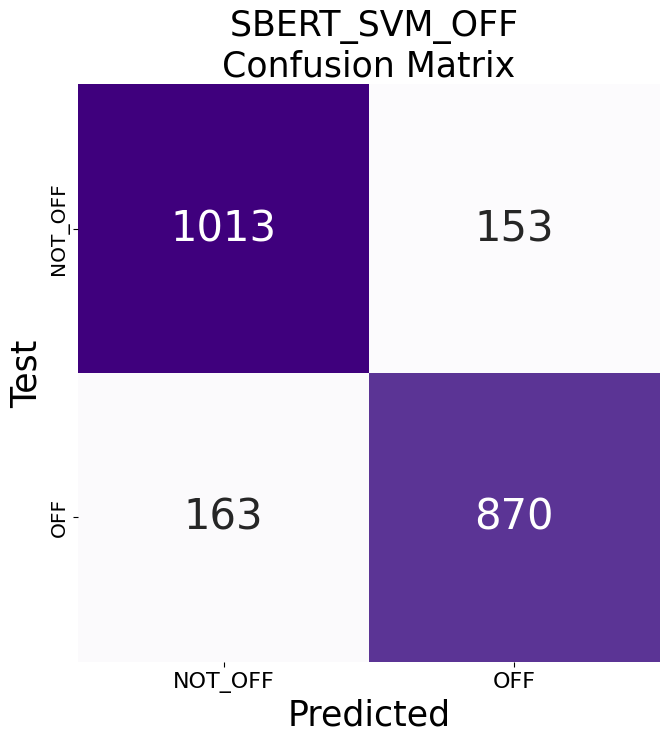

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


def conf_matrix(y, y_pred, title, labels):
    fig, ax =plt.subplots(figsize=(7.5,7.5))
    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Purples", fmt='g', cbar=False, annot_kws={"size":30})
    plt.title(title, fontsize=25)
    ax.xaxis.set_ticklabels(labels, fontsize=16)
    ax.yaxis.set_ticklabels(labels, fontsize=14.5)
    ax.set_ylabel('Test', fontsize=25)
    ax.set_xlabel('Predicted', fontsize=25)
    plt.show()



conf_matrix(Y_test, predictions,' SBERT_SVM_OFF\nConfusion Matrix', target_names)

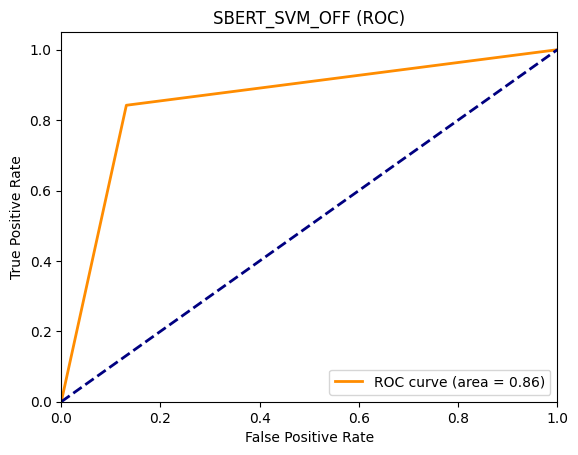

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SBERT_SVM_OFF (ROC)')
plt.legend(loc="lower right")
plt.show()